<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

#Load data

In [0]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_targets = df_train.Surv_time_months

In [0]:
test_targets = df_test.Surv_time_months

#Matrice di dispersione

Creiamo una matrice a dispersione, la quale ci consente
di rappresentare le correlazioni a coppie fra le diverse caratteristiche di
questo dataset.

In [0]:
#sns.set(style='whitegrid', context='notebook')
#cols = train_data.columns
#sns.pairplot(train_data[cols], height=2.5)
#plt.show()

#Matrice di correlazione

In [0]:
train_data_with_Surv_time_months = df_train.drop(['Histology', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)
test_data_with_Surv_time_months = df_test.drop(['Histology', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

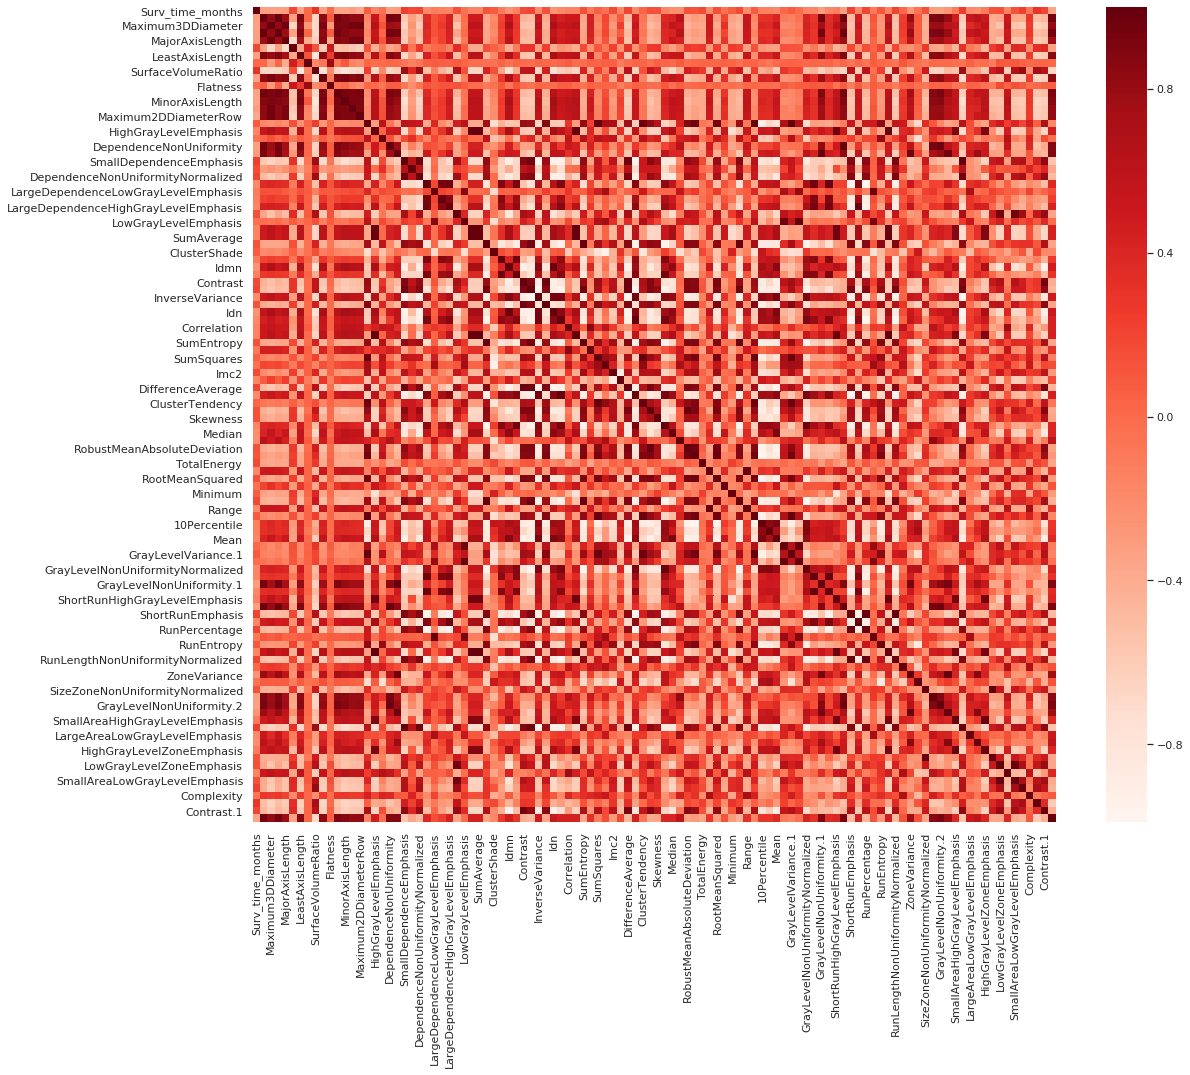

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(18, 15))
cor = train_data_with_Surv_time_months.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [0]:
cor

,Surv_time_months,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness
Surv_time_months,1.000000,-0.318936,-0.334456,-0.318857,-0.319466,0.190327,-0.332525,0.005105,0.308066,-0.331666,-0.002128,-0.346001,-0.346330,-0.311450,-0.371979,0.083421,-0.160541,-0.044520,-0.318601,-0.301370,0.242758,0.176155,0.212086,-0.182908,-0.109064,-0.121039,-0.165635,0.142142,-0.035932,-0.150004,-0.150004,0.132654,0.078411,-0.107315,-0.238044,-0.140528,0.173701,0.201963,-0.197362,0.138151,...,-0.139275,-0.141581,-0.179059,0.015111,0.080174,-0.013388,-0.166599,-0.165808,-0.300326,-0.179774,-0.133786,-0.317132,0.207541,-0.176028,0.202787,-0.085902,0.101709,-0.159741,0.209097,0.005735,-0.263767,-0.050776,0.143465,-0.319172,-0.327871,-0.263775,-0.097382,0.246940,-0.184328,-0.209479,-0.108228,0.139274,0.148019,-0.165691,0.144478,0.236936,-0.071161,0.305331,0.202746,-0.354545
VoxelVolume,-0.318936,1.000000,0.821982,0.999999,0.785606,-0.329751,0.898913,0.020392,-0.679146,0.832976,0.072277,0.950756,0.889105,0.838170,0.837324,-0.176830,0.528070,0.033228,0.939428,0.923283,-0.572156,-0.317799,-0.486348,0.369668,0.144763,0.216950,0.432934,-0.362273,-0.015689,0.493080,0.493080,-0.356995,-0.200703,0.205100,0.524585,0.270697,-0.436992,-0.487864,0.510222,-0.388195,...,0.323978,0.328833,0.413992,-0.111564,-0.142230,-0.052167,0.418276,0.298776,0.938199,0.350780,0.469435,0.973643,-0.490008,0.469550,-0.458102,0.118459,-0.254205,0.530056,-0.501210,0.248150,0.799097,0.075534,-0.411886,0.899479,0.922172,0.799043,0.475936,-0.572976,0.523293,0.611567,0.497011,-0.412217,-0.368620,0.506717,-0.381946,-0.401634,0.277302,-0.510155,-0.458069,0.937894
Maximum3DDiameter,-0.334456,0.821982,1.000000,0.821800,0.964760,-0.678628,0.812696,-0.271438,-0.683336,0.917765,-0.271877,0.911623,0.901223,0.940584,0.958797,-0.220656,0.639461,0.133962,0.786661,0.741102,-0.654213,-0.251020,-0.605156,0.395214,0.129414,0.263112,0.460671,-0.531704,-0.054131,0.608983,0.608983,-0.375524,-0.180379,0.249756,0.670078,0.298131,-0.525327,-0.549153,0.599396,-0.433522,...,0.398349,0.371992,0.526980,-0.183269,-0.180156,-0.108437,0.445523,0.317060,0.755681,0.371774,0.594074,0.812268,-0.527681,0.517503,-0.498173,0.073990,-0.270332,0.641334,-0.547216,0.265182,0.621154,0.068929,-0.434710,0.782626,0.794181,0.621175,0.575123,-0.657133,0.372469,0.461945,0.595651,-0.428361,-0.533330,0.573314,-0.555928,-0.586992,0.257297,-0.642559,-0.592542,0.810919
MeshVolume,-0.318857,0.999999,0.821800,1.000000,0.785457,-0.329524,0.898705,0.

#Z-score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

#Train Test Split

Per ora facciamo train test split, ma vista la scarsità di dato sarebbe meglio una cross validation

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 X_train, X_val, y_train, y_val = train_test_split(train_data_stand, train_targets, test_size=0.3, random_state=0)

#Modello a regressione multipla

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_val_pred = slr.predict(X_val)

##Grafico dei residui

Utilizzando il codice seguente, tracciamo un grafico dei residui, dove
semplicemente sottraiamo le vere variabili target dai responsi previsti.

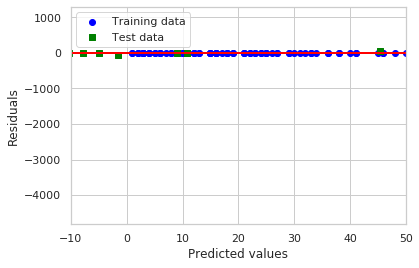

In [0]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_val_pred, y_val_pred - y_val, c='green', marker='s', label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()


In [0]:
max(y_train_pred - y_train)

4.261480057721201e-12

In [0]:
max(y_val_pred - y_val)

1016.2767647056171

##MAE Valutation

In [0]:
from sklearn.metrics import mean_absolute_error
print(f'MAE train: {mean_absolute_error(y_train, y_train_pred)}, val: {mean_absolute_error(y_val, y_val_pred)}')

##MSE Valutation

Un’altra misura quantitativa utile delle prestazioni del modello è il
cosiddetto MSE (Mean Squared Error).

In [0]:
from sklearn.metrics import mean_squared_error
print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}, val: {mean_squared_error(y_val, y_val_pred)}')

MSE train: 0.000, val: 565838.301


##R^2 Valutation

Talvolta può essere più utile rilevare il coefficiente di determinazione
(R^2), che può essere considerato una versione standardizzata dell’errore MSE

Per il dataset di addestramento, R^2
 è compreso fra 0 e 1, ma può
diventare negativo per il set di test. Se R^2=1
 , il modello individua
perfettamente i dati e il corrispondente MSE è uguale a 0.


In [0]:
from sklearn.metrics import r2_score
print(f'R^2 train: {r2_score(y_train, y_train_pred)}, val: {r2_score(y_val, y_val_pred)}')

R^2 train: 1.000, test: -2068.711


#Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
forest = RandomForestRegressor(n_estimators=50, criterion='mse', random_state=1, n_jobs=-1)

In [0]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_val_pred = forest.predict(X_val)

##Grafico dei residui

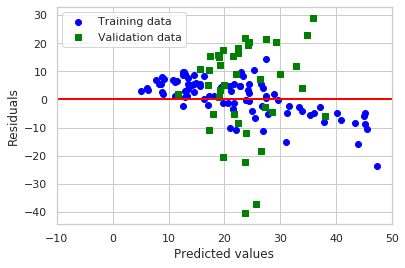

In [0]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', alpha=1, label='Training data')
plt.scatter(y_val_pred, y_val_pred - y_val, c='green', marker='s', alpha=1, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

##MAE Valutation

In [0]:
from sklearn.metrics import mean_absolute_error
print(f'MAE train: {mean_absolute_error(y_train, y_train_pred)}, val: {mean_absolute_error(y_val, y_val_pred)}')

MAE train: 5.509230769230769, val: 13.8265


##MSE Valutation

In [0]:
from sklearn.metrics import mean_squared_error
print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}, val: {mean_squared_error(y_val, y_val_pred)}')

MSE train: 47.85036043956044, val: 272.14667


##R^2 Valutation

In [0]:
from sklearn.metrics import r2_score
print(f'R^2 train: {r2_score(y_train, y_train_pred)}, val: {r2_score(y_val, y_val_pred)}')

R^2 train: 0.8275814623745746, val: 0.004547825450821219


#SVM Regressor

In [0]:
from sklearn.svm import SVR

In [0]:
clf = SVR()

In [0]:
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

##Grafico dei residui

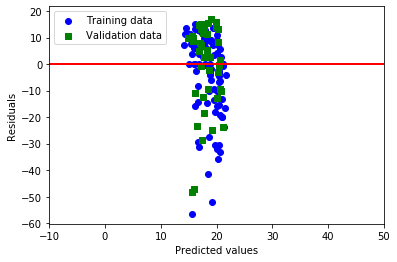

In [0]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', alpha=1, label='Training data')
plt.scatter(y_val_pred, y_val_pred - y_val, c='green', marker='s', alpha=1, label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

##MAE Valutation

In [0]:
from sklearn.metrics import mean_absolute_error
print(f'MAE train: {mean_absolute_error(y_train, y_train_pred)}, val: {mean_absolute_error(y_val, y_val_pred)}')

MAE train: 12.049673491291301, val: 13.02543293046719


##MSE Valutation

In [0]:
from sklearn.metrics import mean_squared_error
print(f'MSE train: {mean_squared_error(y_train, y_train_pred)}, val: {mean_squared_error(y_val, y_val_pred)}')

MSE train: 265.73890457479587, val: 276.089518771327


##R^2 Valutation

In [0]:
from sklearn.metrics import r2_score
print(f'R^2 train: {r2_score(y_train, y_train_pred)}, val: {r2_score(y_val, y_val_pred)}')

R^2 train: 0.04246670461674684, val: -0.009874241089019353


##R^2 Valutation

In [0]:
from sklearn.metrics import r2_score
print(f'R^2 train: {r2_score(y_train, y_train_pred)}, val: {r2_score(y_val, y_val_pred)}')

R^2 train: 0.8275814623745746, val: 0.004547825450821219


#Matrice di dispersione per le features che correlano di più con il Surv_time_months

##Features correlate con l'aspettativa di vita

Cerchiamo le features che correlano meglio con l'aspettativa di vita

In [0]:
train_data = df_train.drop(['Histology', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

Consideriamo train_data contenente anche 'Surv_time_months'. Calcoliamo la matrice di correlazione.

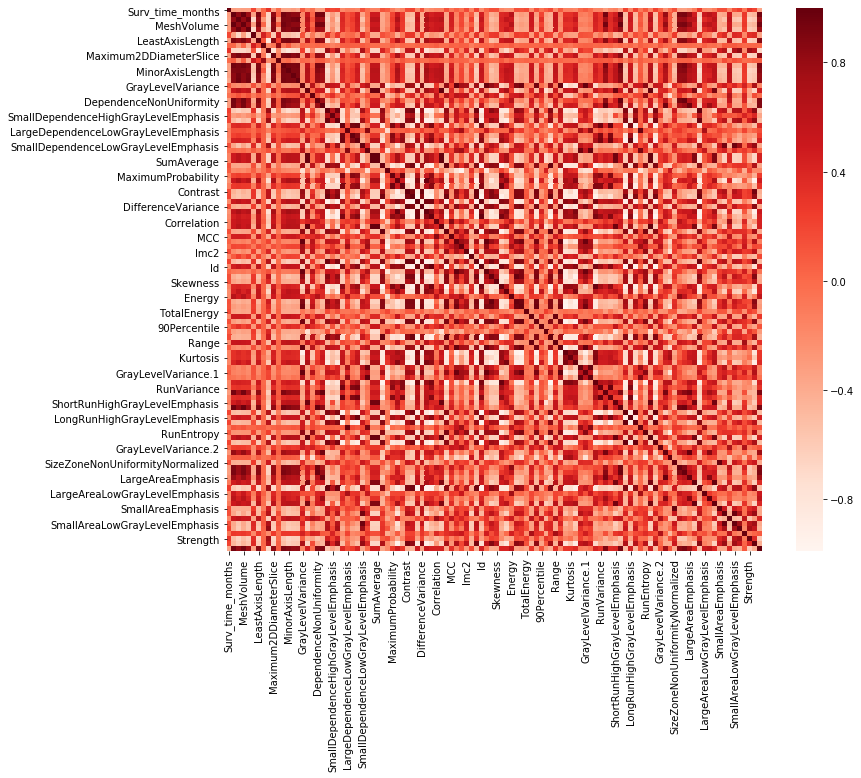

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(cor["Surv_time_months"])

In [0]:
cor_target

Surv_time_months     1.000000
VoxelVolume          0.318936
Maximum3DDiameter    0.334456
MeshVolume           0.318857
MajorAxisLength      0.319466
                       ...   
Coarseness           0.236936
Complexity           0.071161
Strength             0.305331
Contrast.1           0.202746
Busyness             0.354545
Name: Surv_time_months, Length: 108, dtype: float64

In [0]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Surv_time_months            1.000000
VoxelVolume                 0.318936
Maximum3DDiameter           0.334456
MeshVolume                  0.318857
MajorAxisLength             0.319466
LeastAxisLength             0.332525
SurfaceVolumeRatio          0.308066
Maximum2DDiameterSlice      0.331666
SurfaceArea                 0.346001
MinorAxisLength             0.346330
Maximum2DDiameterColumn     0.311450
Maximum2DDiameterRow        0.371979
DependenceNonUniformity     0.318601
GrayLevelNonUniformity      0.301370
GrayLevelNonUniformity.1    0.300326
RunLengthNonUniformity      0.317132
SizeZoneNonUniformity       0.319172
GrayLevelNonUniformity.2    0.327871
Strength                    0.305331
Busyness                    0.354545
Name: Surv_time_months, dtype: float64

 However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

In [0]:
relevant_features_list = list(relevant_features.index)

In [0]:
len(relevant_features_list)

20

Creaiamo un dataframe contente solo le features correlate con il 'Surv_time_months'


In [0]:
train_data_correlated = train_data[train_data.columns.intersection(relevant_features_list)]

In [0]:
train_data_correlated_without_Surv_time_months = train_data_correlated.drop('Surv_time_months', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_data_correlated_without_Surv_time_months.shape

(131, 19)

In [0]:
#create a positive correlation matrix
corr_df = train_data_correlated_without_Surv_time_months.corr().abs()

In [0]:
#create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

In [0]:
tri_df = corr_df.mask(mask)

In [0]:
#Find columns that meet threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.90)]
to_drop

['VoxelVolume',
 'Maximum3DDiameter',
 'MeshVolume',
 'MajorAxisLength',
 'LeastAxisLength',
 'Maximum2DDiameterSlice',
 'SurfaceArea',
 'MinorAxisLength',
 'DependenceNonUniformity',
 'GrayLevelNonUniformity',
 'RunLengthNonUniformity',
 'GrayLevelNonUniformity.2']

The reason we used the mask to set half of the matrox to NA value is that we eant to avoid removing both features when thay have a strong correlation. 

In [0]:
#Drop those columns
train_data_correlated_reduced = train_data_correlated_without_Surv_time_months.drop(to_drop, axis=1)

In [0]:
train_data_correlated_reduced.shape

(131, 7)

funziona bene, però bisogna stare attenti a basarsi unicamente sul coefficiente di correlazione. Se y = x^2, x e y risulteranno scorrelate secondo il coeffiente di correlazione di Pearson.

In [0]:
train_data_correlated_reduced

,SurfaceVolumeRatio,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelNonUniformity.1,SizeZoneNonUniformity,Strength,Busyness
0,0.199752,65.067279,55.325619,2288.112500,1145.238698,1.153806,1.306338
1,0.356577,32.760898,56.652510,262.139314,843.878866,2.266070,0.253533
2,0.242519,47.180420,46.322906,626.125860,1319.991542,1.238883,0.611772
3,0.234970,41.329017,46.543116,370.362301,1549.308668,1.157976,0.564313
4,0.159206,83.612205,70.719598,2318.917381,4857.474477,0.390430,1.804351
...,...,...,...,...,...,...,...
126,0.214251,76.812697,70.440926,2560.821913,1559.368341,1.669748,0.768631
127,0.255458,56.756518,92.308342,1604.384232,3219.516173,0.680747,1.374614
128,0.143462,87.676260,97.006463,7169.355208,3686.292297,0.965192,1.584828
129,0.432954,33.353194,31.198569,62.347996,688.557797,2.407473,0.249712


Le features che correlano meglio con il 'Surv_time_months' e sono scorrelate tra loro sono: SurfaceVolumeRatio, Strength e	Busyness. Il numero ovviamente dipende dalle soglie impostate.

##Matrice di dispersione

Creiamo una matrice a dispersione, la quale ci consente
di rappresentare le correlazioni a coppie fra le diverse caratteristiche di
questo dataset.

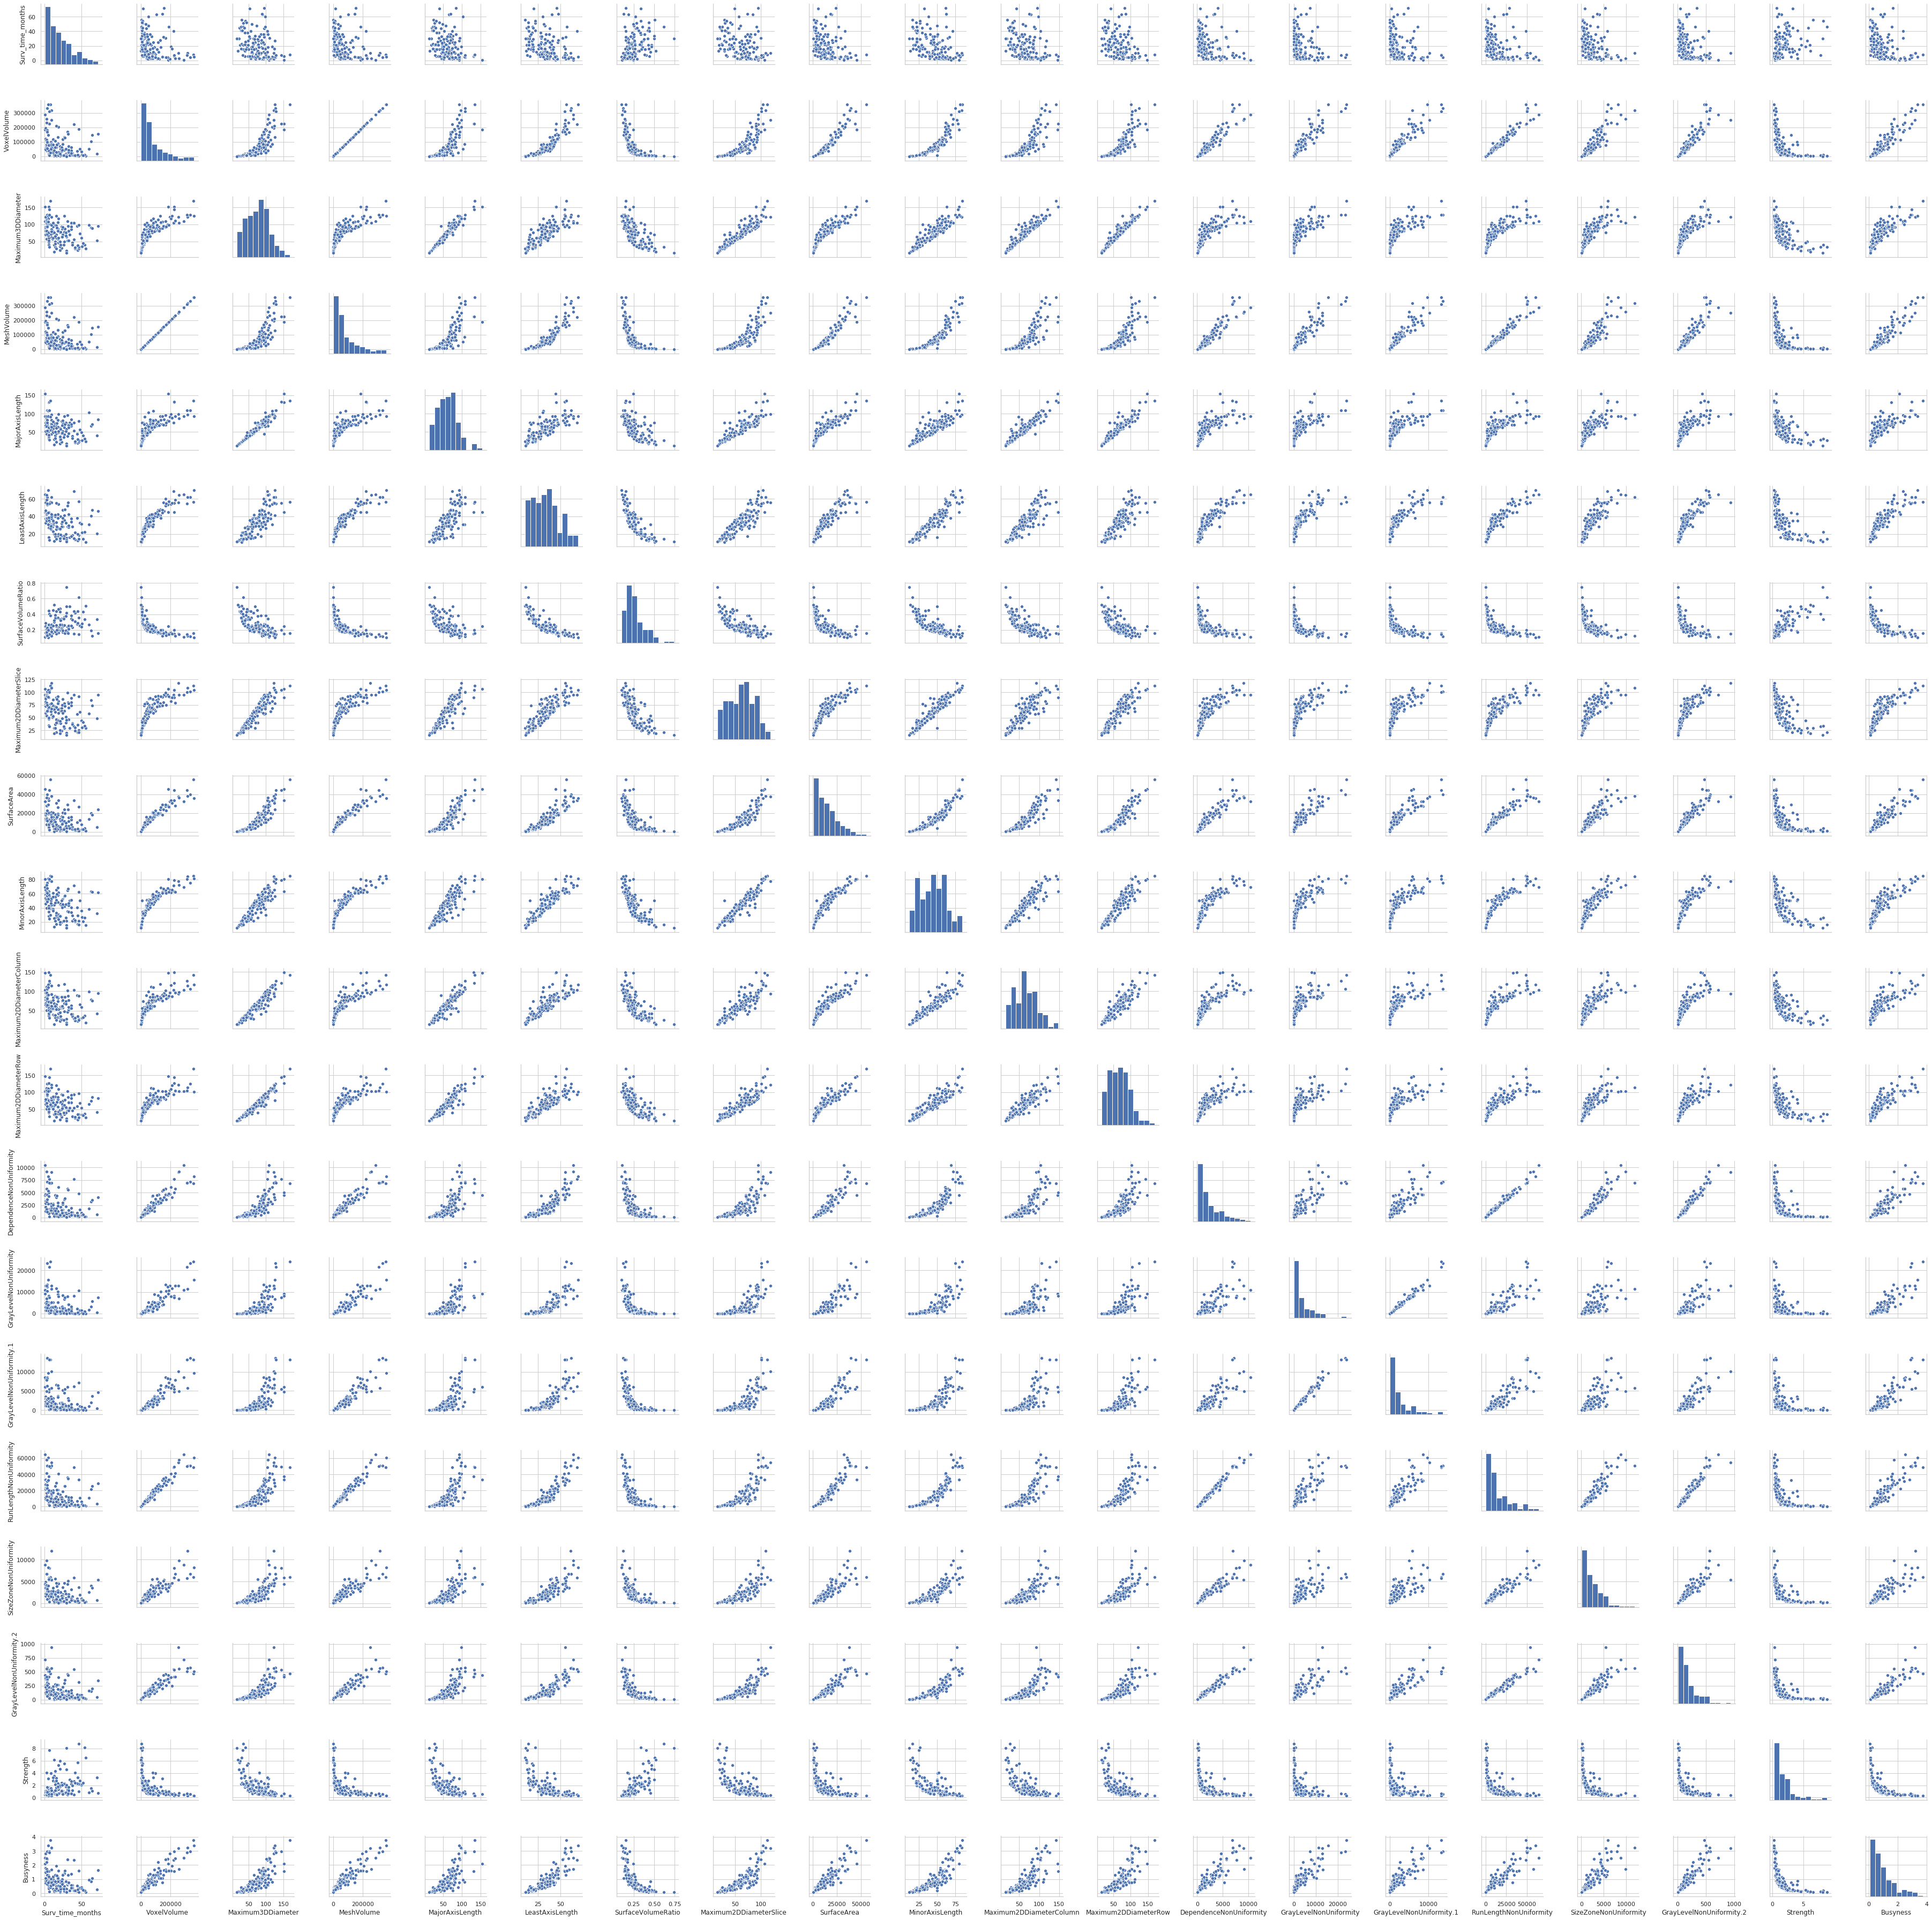

In [0]:
sns.set(style='whitegrid', context='notebook')
cols = train_data_correlated.columns
sns.pairplot(train_data_correlated[cols], height=2.5)
plt.show()

In [0]:
train_data_correlated_reduced_with_Surv_time_motnhs = train_data_correlated.drop(to_drop, axis=1)

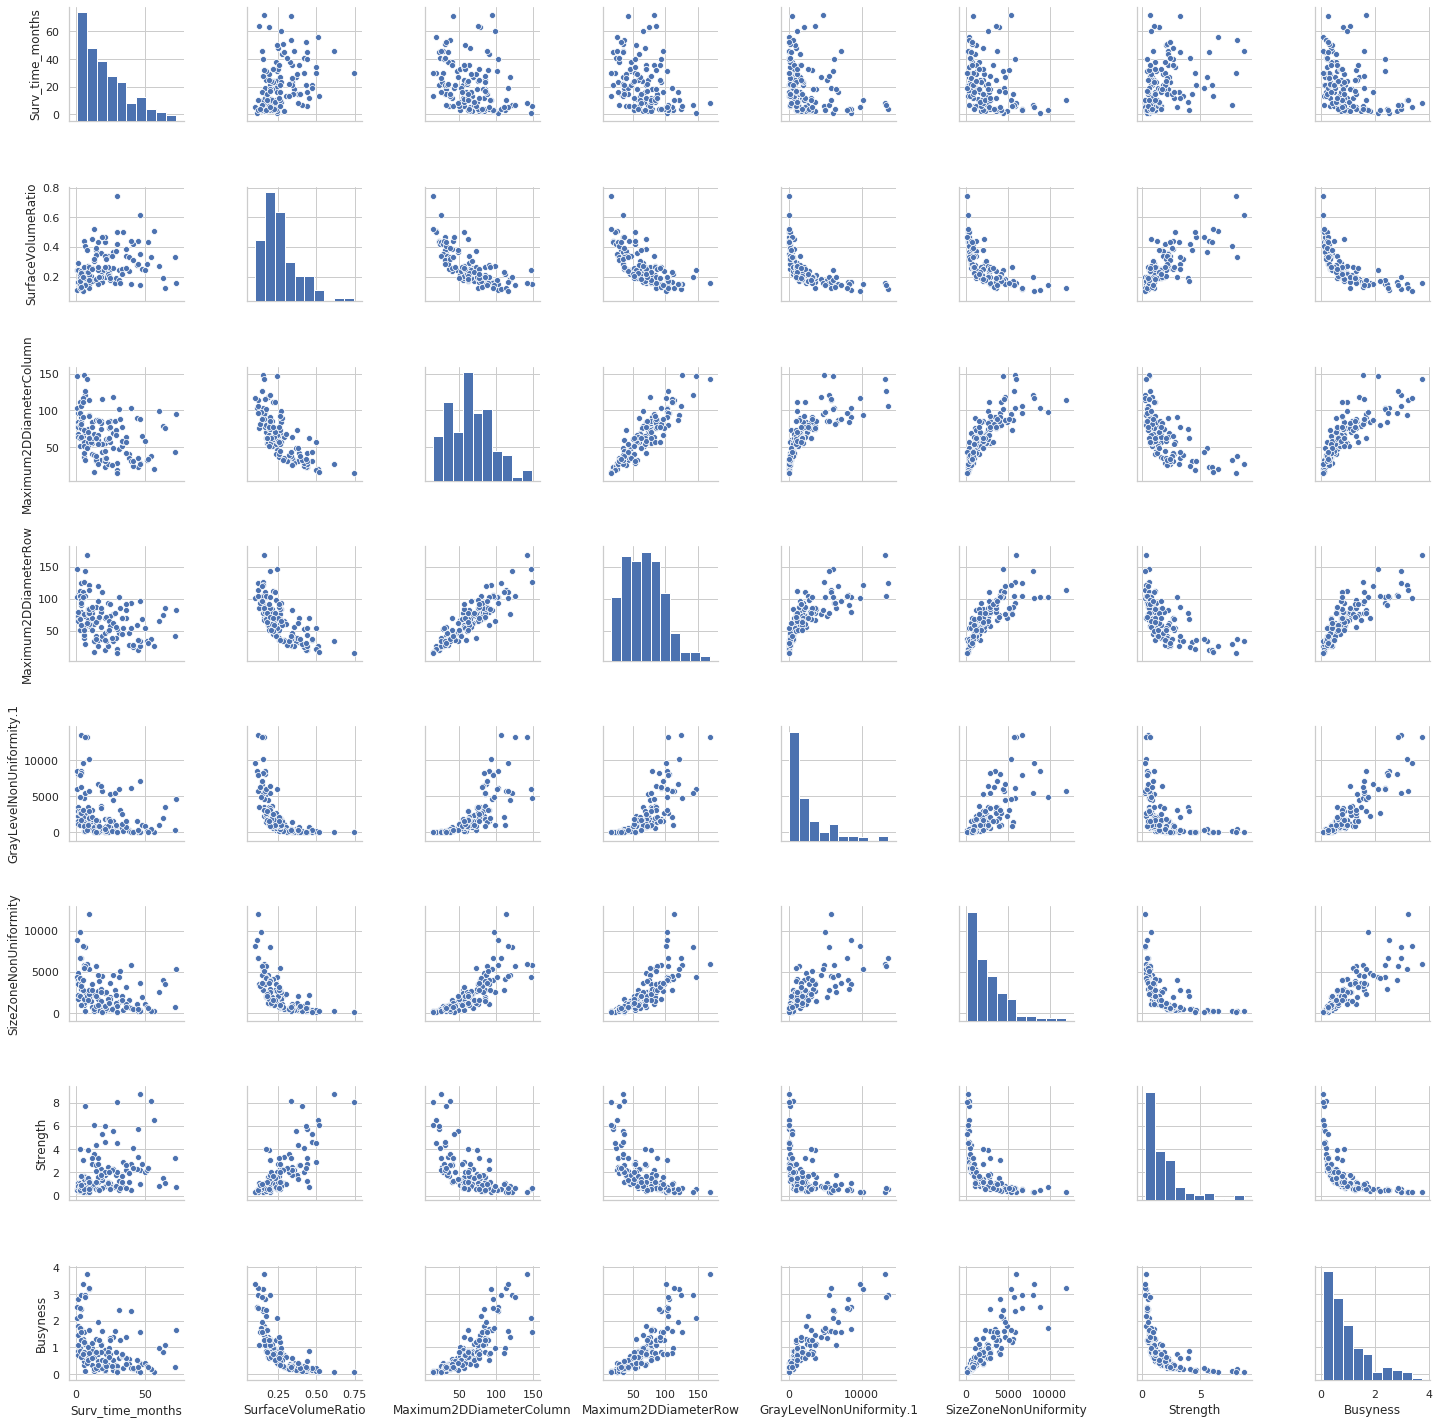

In [0]:
sns.set(style='whitegrid', context='notebook')
cols = train_data_correlated_reduced_with_Surv_time_motnhs.columns
sns.pairplot(train_data_correlated_reduced_with_Surv_time_motnhs[cols], height=2.5)
plt.show()